In [9]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Análise P/L ao longo do tempo

In [2]:
#ticker escolhido
tick = 'PETR3.SA'
ticker = yf.Ticker(tick)
ticker

yfinance.Ticker object <PETR3.SA>

In [3]:
data_1 = '2023-12-31'
data_2 = '2022-12-31'
data_3 = '2021-12-31'
data_4 = '2020-12-31'

data_1_1 = '2023-12-28'
data_2_2 = '2022-12-28'
data_3_3 = '2021-12-28'
data_4_4 = '2020-12-28'

In [4]:
df_income = ticker.income_stmt
lucro_liq = df_income.loc['Net Income From Continuing And Discontinued Operation']

lucro_liq_31_12_2023 = lucro_liq[data_1]
lucro_liq_31_12_2022 = lucro_liq[data_2]
lucro_liq_31_12_2021 = lucro_liq[data_3]
lucro_liq_31_12_2020 = lucro_liq[data_4]

print(lucro_liq_31_12_2023,lucro_liq_31_12_2022,lucro_liq_31_12_2021,lucro_liq_31_12_2020)

24884000000.0 36623000000.0 19875000000.0 1141000000.0


In [5]:
df_close = pd.read_csv('data_yfinance/stocks.csv')
#close = df_close[['Date','ticker', 'Close']]

close_31_12_2023 = df_close.loc[(df_close['ticker'] == tick) & (df_close['Date'] == data_1_1)]['Close'].values[0].round(2)
close_31_12_2022 = df_close.loc[(df_close['ticker'] == tick) & (df_close['Date'] == data_2_2)]['Close'].values[0].round(2)
close_31_12_2021 = df_close.loc[(df_close['ticker'] == tick) & (df_close['Date'] == data_3_3)]['Close'].values[0].round(2)
close_31_12_2020 = df_close.loc[(df_close['ticker'] == tick) & (df_close['Date'] == data_4_4)]['Close'].values[0].round(2)

print(close_31_12_2023,close_31_12_2022,close_31_12_2021,close_31_12_2020)

38.98 28.5 31.06 28.65


In [6]:
shares = ticker.get_shares_full().iloc[0]
shares

12312800256

In [7]:
p_l_2023 = (close_31_12_2023*shares/lucro_liq_31_12_2023).round(2)
p_l_2022 = (close_31_12_2022*shares/lucro_liq_31_12_2022).round(2)
p_l_2021 = (close_31_12_2021*shares/lucro_liq_31_12_2021).round(2)
p_l_2020 = (close_31_12_2020*shares/lucro_liq_31_12_2020).round(2)

print(p_l_2023,p_l_2022,p_l_2021,p_l_2020)

19.29 9.58 19.24 309.17


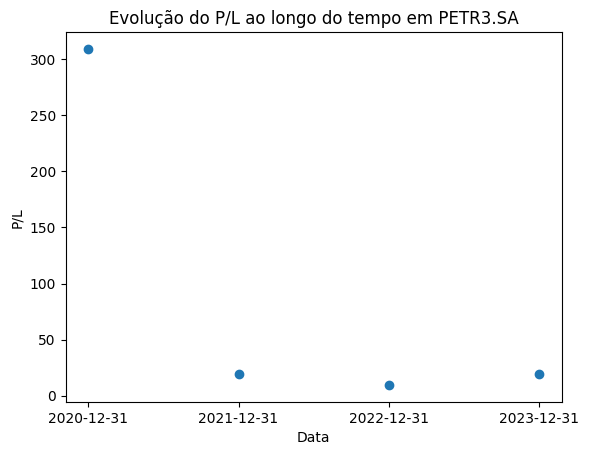

In [10]:
x = [data_4, data_3, data_2, data_1]  # datas
y = [p_l_2020, p_l_2021, p_l_2022, p_l_2023]  # valores de P/L

plt.scatter(x, y)

plt.title(f'Evolução do P/L ao longo do tempo em {tick}')
plt.xlabel('Data')
plt.ylabel('P/L')

plt.show()
